In [76]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)

def process_hourly_data(csv_directory="../../PROMICE-AWS-toolbox/out/L4", add_meta_data=False):
        # List all CSV files in the directory
    csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

    # Combine all CSV files into a single DataFrame
    dfs = []
    for f in csv_files:
        df = pd.read_csv(os.path.join(csv_directory, f), index_col=False)
        df.insert(0, 'stid', f[:-7])
        dfs.append(df)
    df_hourly = pd.concat(dfs)
    return df_hourly
df = process_hourly_data()



In [40]:

df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
def daily_mean_with_min_count(series, min_count=20):
    non_nan_count = series.count()
    if non_nan_count >= min_count:
        return series.mean()
    else:
        return np.nan

daily_values = df.groupby('stid').resample('D').agg(daily_mean_with_min_count)
display(daily_values)

C:\Users\mabj16ac\AppData\Local\Temp\2\ipykernel_1052\3862261221.py:10: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the function.
  daily_values = df.groupby('stid').resample('D').agg(daily_mean_with_min_count)


p_u     t_u   rh_u  rh_u_cor  qh_u  \
stid    time                                                               
CEN1    2017-05-23 00:00:00+00:00     NaN     NaN    NaN       NaN   NaN   
        2017-05-24 00:00:00+00:00     NaN     NaN    NaN       NaN   NaN   
        2017-05-25 00:00:00+00:00     NaN     NaN    NaN       NaN   NaN   
        2017-05-26 00:00:00+00:00     NaN     NaN    NaN       NaN   NaN   
        2017-05-27 00:00:00+00:00     NaN     NaN    NaN       NaN   NaN   
...                                   ...     ...    ...       ...   ...   
ZAK_Uv3 2022-12-21 00:00:00+00:00 920.292 -18.773 50.800    61.136 0.480   
        2022-12-22 00:00:00+00:00 920.667 -23.531 46.263    58.179 0.289   
        2022-12-23 00:00:00+00:00 916.364 -19.733 58.258    70.548 0.505   
        2022-12-24 00:00:00+00:00 914.826 -22.146 44.324    55.012 0.314   
        2022-12-25 00:00:00+00:00     NaN     NaN    NaN       NaN   NaN   

                                   wspd_u  wdir_u    dsr  dsr_cor   usr  ...  \
stid    time                                                             ...   
CEN1    2017-05-23 00:00:00+00:00     NaN     NaN    NaN      NaN   NaN  ...   
        2017-05-24 00:00:00+00:00     NaN     NaN    NaN      NaN   NaN  ...   
        2017-05-25 00:00:00+00:00     NaN     NaN    NaN      NaN   NaN  ...   
        2017-05-26 00:00:00+00:00     NaN     NaN    NaN      NaN   NaN  ...   
        2017-05-27 00:00:00+00:00     NaN     NaN    NaN      NaN   NaN  ...   
...                                   ...     ...    ...      ...   ...  ...   
ZAK_Uv3 2022-12-21 00:00:00+00:00   2.781 304.538 -1.379    0.000 1.010  ...   
        2022-12-22 00:00:00+00:00   5.199 325.643 -1.844    0.000 1.211  ...   
        2022-12-23 00:00:00+00:00   4.003 295.242 -0.879    0.000 0.791  ...   
        2022-12-24 00:00:00+00:00   4.560 330.478 -1.623    0.000 1.057  ...   
        2022-12-25 00:00:00+00:00     NaN     NaN    NaN      NaN   NaN  ...   

                                   t_i_10  t_i_11  fan_dc_l  depth_t_i_9  \
stid    time                                                               
CEN1    2017-05-23 00:00:00+00:00     NaN     NaN       NaN          NaN   
        2017-05-24 00:00:00+00:00     NaN     NaN       NaN          NaN   
        2017-05-25 00:00:00+00:00     NaN     NaN       NaN          NaN   
        2017-05-26 00:00:00+00:00     NaN     NaN       NaN          NaN   
        2017-05-27 00:00:00+00:00     NaN     NaN       NaN          NaN   
...                                   ...     ...       ...          ...   
ZAK_Uv3 2022-12-21 00:00:00+00:00     NaN     NaN       NaN          NaN   
        2022-12-22 00:00:00+00:00     NaN     NaN       NaN          NaN   
        2022-12-23 00:00:00+00:00     NaN     NaN       NaN          NaN   
        2022-12-24 00:00:00+00:00     NaN     NaN       NaN          NaN   
        2022-12-25 00:00:00+00:00     NaN     NaN       NaN          NaN   

                                   depth_t_i_10  depth_t_i_11  \
stid    time                                                    
CEN1    2017-05-23 00:00:00+00:00           NaN           NaN   
        2017-05-24 00:00:00+00:00           NaN           NaN   
        2017-05-25 00:00:00+00:00           NaN           NaN   
        2017-05-26 00:00:00+00:00           NaN           NaN   
        2017-05-27 00:00:00+00:00           NaN           NaN   
...                                         ...           ...   
ZAK_Uv3 2022-12-21 00:00:00+00:00           NaN           NaN   
        2022-12-22 00:00:00+00:00           NaN           NaN   
        2022-12-23 00:00:00+00:00           NaN           NaN   
        2022-12-24 00:00:00+00:00           NaN           NaN   
        2022-12-25 00:00:00+00:00           NaN           NaN   

                                   z_pt_cor_adj_flag  z_pt_cor_adj  \
stid    time                                                         
CEN1    2017-05-23 00:00:00+00:00

In [43]:
df = daily_values.copy()
shape = df.shape
stations = df.index.get_level_values(0).nunique()
df['time'] = pd.to_datetime(df.index.get_level_values(1))
max_year, min_year = df['time'].dt.year.min(), df['time'].dt.year.max()
features = list(df.columns)

print('Dataframe Head')
display(df.head(5))
print(f'No. of Observations: {shape[0]:,}')
print(f'No. of Features: {shape[1]}')
print(f'Stations: {stations}')
print(f'Max Year: {max_year}, Min Year: {min_year}')

print('-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print('FEATURES')
print('    Categorical:')
print(f'        {features[0]}')
print('    Datetime:')
print(f'        {features[1]}')
print('    float64:')

features = features[2:]
line = ''
for idx, item in enumerate(features):
    if idx < len(features) - 1:
        separator = ", "
    else:
        separator = ""

    # Check if adding the current item and separator will exceed the maximum line length
    if len(line) + len(str(item)) + len(separator) > 200:
        print('        ' + line)
        line = ""

    line += f"{item}{separator}"

# Print the remaining items
if line:
    print('        ' + line)


Dataframe Head


p_u  t_u  rh_u  rh_u_cor  qh_u  wspd_u  \
stid time                                                                
CEN1 2017-05-23 00:00:00+00:00  NaN  NaN   NaN       NaN   NaN     NaN   
     2017-05-24 00:00:00+00:00  NaN  NaN   NaN       NaN   NaN     NaN   
     2017-05-25 00:00:00+00:00  NaN  NaN   NaN       NaN   NaN     NaN   
     2017-05-26 00:00:00+00:00  NaN  NaN   NaN       NaN   NaN     NaN   
     2017-05-27 00:00:00+00:00  NaN  NaN   NaN       NaN   NaN     NaN   

                                wdir_u  dsr  dsr_cor  usr  ...  t_i_11  \
stid time                                                  ...           
CEN1 2017-05-23 00:00:00+00:00     NaN  NaN      NaN  NaN  ...     NaN   
     2017-05-24 00:00:00+00:00     NaN  NaN      NaN  NaN  ...     NaN   
     2017-05-25 00:00:00+00:00     NaN  NaN      NaN  NaN  ...     NaN   
     2017-05-26 00:00:00+00:00     NaN  NaN      NaN  NaN  ...     NaN   
     2017-05-27 00:00:00+00:00     NaN  NaN      NaN  NaN  ...     NaN   

                                fan_dc_l  depth_t_i_9  depth_t_i_10  \
stid time                                                             
CEN1 2017-05-23 00:00:00+00:00       NaN          NaN           NaN   
     2017-05-24 00:00:00+00:00       NaN          NaN           NaN   
     2017-05-25 00:00:00+00:00       NaN          NaN           NaN   
     2017-05-26 00:00:00+00:00       NaN          NaN           NaN   
     2017-05-27 00:00:00+00:00       NaN          NaN           NaN   

                                depth_t_i_11  z_pt_cor_adj_flag  z_pt_cor_adj  \
stid time                                                                       
CEN1 2017-05-23 00:00:00+00:00           NaN                NaN           NaN   
     2017-05-24 00:00:00+00:00           NaN                NaN           NaN   
     2017-05-25 00:00:00+00:00           NaN                NaN           NaN   
     2017-05-26 00:00:00+00:00           NaN                NaN           NaN   
     2017-05-27 00:00:00+00:00           NaN                NaN           NaN   

                                z_surf_1_adj  z_surf_2_adj  \
stid time                                                    
CEN1 2017-05-23 00:00:00+00:00           NaN           NaN   
     2017-05-24 00:00:00+00:00           NaN           NaN   
     2017-05-25 00:00:00+00:00           NaN           NaN   
     2017-05-26 00:00:00+00:00           NaN           NaN   
     2017-05-27 00:00:00+00:00           NaN           NaN   

                                                    time  
stid time                                                 
CEN1 2017-05-23 00:00:00+00:00 2017-05-23 00:00:00+00:00  
     2017-05-24 00:00:00+00:00 2017-05-24 00:00:00+00:00  
     2017-05-25 00:00:00+00:00 2017-05-25 00:00:00+00:00  
     2017-05-26 00:00:00+00:00 2017-05-26 00:00:00+00:00  
     2017-05-27 00:00:00+00:00 2017-05-27 00:00:00+00:00  

[5 rows x 91 columns]

No. of Observations: 244,305
No. of Features: 90
Stations: 56
Max Year: 1990, Min Year: 2023
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
FEATURES
    Categorical:
        p_u
    Datetime:
        t_u
    float64:
        rh_u, rh_u_cor, qh_u, wspd_u, wdir_u, dsr, dsr_cor, usr, usr_cor, albedo, dlr, ulr, cc, t_surf, dlhf_u, dshf_u, z_boom_u, z_stake, z_pt, z_pt_cor, precip_u, precip_u_cor, t_i_1, t_i_2, t_i_3, t_i_4, 
        t_i_5, t_i_6, t_i_7, t_i_8, tilt_x, tilt_y, rot, gps_lat, gps_lon, gps_alt, gps_time, gps_geoid, gps_geounit, gps_hdop, gps_numsat, gps_q, batt_v, batt_v_ini, batt_v_ss, fan_dc_u, freq_vw, t_log, 
        t_rad, msg_lat, msg_lon, z_surf_1, z_surf_2, z_surf_1_adj_flag, z_surf_2_adj_flag, z_surf_combined, depth_t_i_1, depth_t_i_2, depth_t_i_3, depth_t_i_4, depth_t_i_5, depth_t_i_6, depth_t_i_7, 
       

In [2]:
display(df.describe())

,p_u,t_u,rh_u,rh_u_cor,qh_u,wspd_u,wdir_u,dsr,dsr_cor,usr,...,t_i_10,t_i_11,fan_dc_l,depth_t_i_9,depth_t_i_10,depth_t_i_11,z_pt_cor_adj_flag,z_pt_cor_adj,z_surf_1_adj,z_surf_2_adj
count,4240097.000,4797996.000,4386088.000,4386088.000,3742450.000,4443963.000,4161613.000,2584053.000,4520066.000,2576914.000,...,803100.000,79459.000,97229.000,2275298.000,2275298.000,108090.000,2088671.000,2069409.000,2220701.000,1930516.000
mean,860.783,-13.294,74.871,84.626,1.851,5.498,155.332,121.924,131.884,78.347,...,-21.880,-20.036,54.649,9.283,9.049,9.972,0.590,-15.542,-11.522,-13.601
std,88.810,13.163,15.253,17.535,1.428,3.702,86.072,200.731,198.603,128.042,...,6.075,4.266,30.563,5.886,6.646,0.614,0.492,17.209,14.351,16.964
min,640.000,-73.660,0.000,0.000,0.000,0.000,0.000,-10.000,0.000,-9.295,...,-45.000,-28.670,3.480,-6.190,-7.190,4.836,0.000,-88.089,-83.996,-88.100
25%,776.000,-21.930,65.530,74.454,0.610,2.930,94.500,-0.641,0.000,0.455,...,-27.130,-22.770,15.000,4.940,3.760,9.570,0.000,-20.428,-16.739,-18.057
50%,893.600,-11.370,75.997,89.174,1.500,4.901,136.268,5.872,13.010,5.186,...,-20.640,-19.380,64.640,8.140,8.080,9.834,1.000,-10.032,-7.058,-7.998
75%,933.000,-2.724,85.552,97.572,2.968,7.310,213.400,172.010,206.800,109.861,...,-18.360,-18.600,75.850,11.820,12.530,10.191,1.000,-4.049,-1.205,-1.788
max,1049.884,29.830,144.100,162.550,16.796,100.000,360.000,1500.000,983.179,998.886,...,0.100,0.092,150.100,28.870,29.870,12.058,1.000,20.959,11.902,10.841


In [4]:
print(df.columns)

Index(['stid', 'time', 'p_u', 't_u', 'rh_u', 'rh_u_cor', 'qh_u', 'wspd_u',
       'wdir_u', 'dsr', 'dsr_cor', 'usr', 'usr_cor', 'albedo', 'dlr', 'ulr',
       'cc', 't_surf', 'dlhf_u', 'dshf_u', 'z_boom_u', 'z_stake', 'z_pt',
       'z_pt_cor', 'precip_u', 'precip_u_cor', 't_i_1', 't_i_2', 't_i_3',
       't_i_4', 't_i_5', 't_i_6', 't_i_7', 't_i_8', 'tilt_x', 'tilt_y', 'rot',
       'gps_lat', 'gps_lon', 'gps_alt', 'gps_time', 'gps_geoid', 'gps_geounit',
       'gps_hdop', 'gps_numsat', 'gps_q', 'batt_v', 'batt_v_ini', 'batt_v_ss',
       'fan_dc_u', 'freq_vw', 't_log', 't_rad', 'msg_lat', 'msg_lon',
       'z_surf_1', 'z_surf_2', 'z_surf_1_adj_flag', 'z_surf_2_adj_flag',
       'z_surf_combined', 'depth_t_i_1', 'depth_t_i_2', 'depth_t_i_3',
       'depth_t_i_4', 'depth_t_i_5', 'depth_t_i_6', 'depth_t_i_7',
       'depth_t_i_8', 't_i_10m', 'p_l', 't_l', 'rh_l', 'rh_l_cor', 'qh_l',
       'wspd_l', 'wdir_l', 'dlhf_l', 'dshf_l', 'z_boom_l', 'precip_l',
       'precip_l_cor', 't_i_9', 't_

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5820828 entries, 0 to 23798
Data columns (total 92 columns):
 #   Column             Dtype  
---  ------             -----  
 0   stid               object 
 1   time               object 
 2   p_u                float64
 3   t_u                float64
 4   rh_u               float64
 5   rh_u_cor           float64
 6   qh_u               float64
 7   wspd_u             float64
 8   wdir_u             float64
 9   dsr                float64
 10  dsr_cor            float64
 11  usr                float64
 12  usr_cor            float64
 13  albedo             float64
 14  dlr                float64
 15  ulr                float64
 16  cc                 float64
 17  t_surf             float64
 18  dlhf_u             float64
 19  dshf_u             float64
 20  z_boom_u           float64
 21  z_stake            float64
 22  z_pt               float64
 23  z_pt_cor           float64
 24  precip_u           float64
 25  precip_u_cor       f

None

In [31]:
print(df['stid'].unique())
print(df.columns)

['CEN1' 'CEN2' 'CP1' 'DY2' 'EGP' 'HUM' 'JAR' 'JAR_O' 'KAN_B' 'KAN_L'
 'KAN_M' 'KAN_U' 'KPC_Lv3' 'KPC_Uv3' 'KPC_U' 'LYN_L' 'LYN_T' 'MIT' 'NAE'
 'NAU' 'NEM' 'NSE' 'NUK_K' 'NUK_L' 'NUK_N' 'NUK_Uv3' 'NUK_U' 'QAS_A'
 'QAS_Lv3' 'QAS_L' 'QAS_M' 'QAS_Uv3' 'QAS_U' 'Roof_GEUS' 'Roof_PROMICE'
 'SCO_L' 'SCO_U' 'SDL' 'SDM' 'SWC' 'SWC_O' 'TAS_A' 'TAS_L' 'TAS_U'
 'THU_L2' 'THU_L' 'THU_U2' 'THU_U' 'TUN' 'UPE_L' 'UPE_U' 'UWN' 'WEG_B'
 'ZAK_L' 'ZAK_Uv3' 'ZAK_U']
Index(['stid', 'time', 'p_u', 't_u', 'rh_u', 'rh_u_cor', 'qh_u', 'wspd_u',
       'wdir_u', 'dsr', 'dsr_cor', 'usr', 'usr_cor', 'albedo', 'dlr', 'ulr',
       'cc', 't_surf', 'dlhf_u', 'dshf_u', 'z_boom_u', 'z_stake', 'z_pt',
       'z_pt_cor', 'precip_u', 'precip_u_cor', 't_i_1', 't_i_2', 't_i_3',
       't_i_4', 't_i_5', 't_i_6', 't_i_7', 't_i_8', 'tilt_x', 'tilt_y', 'rot',
       'gps_lat', 'gps_lon', 'gps_alt', 'gps_time', 'gps_geoid', 'gps_geounit',
       'gps_hdop', 'gps_numsat', 'gps_q', 'batt_v', 'batt_v_ini', 'batt_v_ss',
       'fan_d

In [44]:
import numpy as np
nan_count = df.isna().sum().sum()

print("Number of NaN values in the dataset:", nan_count)
print(nan_count/shape[0])

Number of NaN values in the dataset: 13295091
54.4200528028489


In [ ]:
z_surf_combined,surface_height_combined
p_u,air_pressure,Air pressure (upper boom)
rh_l_cor,relative_humidity_corrected
cc,cloud_area_fraction,Cloud cover
t_u,air_temperature,Air temperature (upper boom)
wspd_l,wind_speed,Wind speed (lower boom)

In [73]:
stations = ['KPC_U', 'QAS_L','SCO_L', 'UPE_L']
for x in stations:
    print(x)
    stat_df = df.loc[x,:]
    desc = stat_df[['albedo']].describe()
    display(desc)
    print(desc.loc[desc.index == 'count']/stat_df.shape[0])
# [['z_surf_combined','p_u', 'rh_l_cor','cc','wspd_l','t_u']]

KPC_U


,albedo
count,0.000
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


       albedo
count   0.000
QAS_L


,albedo
count,0.000
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


       albedo
count   0.000
SCO_L


,albedo
count,0.000
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


       albedo
count   0.000
UPE_L


,albedo
count,0.000
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


       albedo
count   0.000


In [80]:
display(df['albedo'].isna().sum().sum())


#df['time'] = pd.to_datetime(df['time'])
#df.set_index('time', inplace=True)
def daily_mean_with_min_count(series, min_count=20):
    non_nan_count = series.count()
    return series.mean()

albedo = df[['stid','albedo']].groupby('stid').resample('D').agg(daily_mean_with_min_count)
display(albedo)

4896278

C:\Users\mabj16ac\AppData\Local\Temp\2\ipykernel_1052\3468186169.py:10: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the function.
  albedo = df[['stid','albedo']].groupby('stid').resample('D').agg(daily_mean_with_min_count)


albedo
stid    time                             
CEN1    2017-05-23 00:00:00+00:00     NaN
        2017-05-24 00:00:00+00:00     NaN
        2017-05-25 00:00:00+00:00     NaN
        2017-05-26 00:00:00+00:00     NaN
        2017-05-27 00:00:00+00:00     NaN
...                                   ...
ZAK_Uv3 2022-12-21 00:00:00+00:00     NaN
        2022-12-22 00:00:00+00:00     NaN
        2022-12-23 00:00:00+00:00     NaN
        2022-12-24 00:00:00+00:00     NaN
        2022-12-25 00:00:00+00:00     NaN

[244305 rows x 1 columns]

In [82]:
stations = ['KPC_U', 'QAS_L','SCO_L', 'UPE_L']
for x in stations:
    print(x)
    stat_df = albedo.loc[x,:]
    desc = stat_df[['albedo']].describe()
    display(desc)
    print(desc.loc[desc.index == 'count']/stat_df.shape[0])
# [['z_surf_combined','p_u', 'rh_l_cor','cc','wspd_l','t_u']]

KPC_U


,albedo
count,1631.000
mean,0.783
std,0.100
min,0.425
25%,0.723
50%,0.808
75%,0.843
max,0.999


       albedo
count   0.306
QAS_L


,albedo
count,3288.000
mean,0.469
std,0.269
min,0.122
25%,0.211
50%,0.370
75%,0.750
max,0.997


       albedo
count   0.581
SCO_L


,albedo
count,2408.000
mean,0.520
std,0.177
min,0.266
25%,0.364
50%,0.463
75%,0.695
max,0.992


       albedo
count   0.454
UPE_L


,albedo
count,2028.000
mean,0.667
std,0.116
min,0.470
25%,0.569
50%,0.626
75%,0.777
max,0.984


       albedo
count   0.411


In [134]:
def process_daily_data(csv_directory="../data/promice/preprocessed/daily", add_meta_data=False):
        # List all CSV files in the directory
    csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

    # Combine all CSV files into a single DataFrame
    dfs = []
    for f in csv_files:
        df = pd.read_csv(os.path.join(csv_directory, f), index_col=False)
        dfs.append(df)
    df_daily = pd.concat(dfs)
    return df_daily
df = process_daily_data()


#df.drop(['Surface height from combined measurements DELTA', 'Unnamed: 0'], axis=1,inplace=True)
df.drop([ 'Unnamed: 0'], axis=1,inplace=True)
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.reset_index(inplace=True,drop=True)
display(df)

,stid,Datetime,Air pressure (upper boom),Air temperature (upper boom),Relative humidity (upper boom) - corrected,Specific humidity (upper boom),Wind speed (upper boom),Wind from direction (upper boom),Downwelling shortwave radiation - corrected,Upwelling shortwave radiation - corrected,...,Upwelling longwave radiation,Surface temperature,Latent heat flux (upper boom),Sensible heat flux (upper boom),Surface height from combined measurements,Surface height from combined measurements DELTA,Albedo,Cloud cover,Ablation,Melting Season
0,CEN1,2017-05-23 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,CEN1,2017-05-24 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,CEN1,2017-05-25 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
3,CEN1,2017-05-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,CEN1,2017-05-27 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248046,ZAK_Uv3,2022-12-21 00:00:00+00:00,920.292,-18.773,61.136,0.480,2.781,304.538,0.000,0.000,...,217.492,-23.961,-2.556,22.109,-2.229,-0.025,NaN,0.305,False,NaN
248047,ZAK_Uv3,2022-12-22 00:00:00+00:00,920.667,-23.531,58.179,0.289,5.199,325.643,0.000,0.000,...,202.642,-28.067,-2.882,58.592,-2.242,-0.010,NaN,0.115,False,NaN
248048,ZAK_Uv3,2022-12-23 00:00:00+00:00,916.364,-19.733,70.548,0.505,4.003,295.242,0.000,0.000,...,220.551,-23.170,-2.428,25.118,-2.231,-0.005,NaN,0.512,False,NaN
248049,ZAK_Uv3,2022-12-24 00:00:00+00:00,914.826,-22.146,55.012,0.314,4.560,330.478,0.000,0.000,...,207.072,-26.835,-1.610,53.230,-2.240,-0.005,NaN,0.227,False,NaN


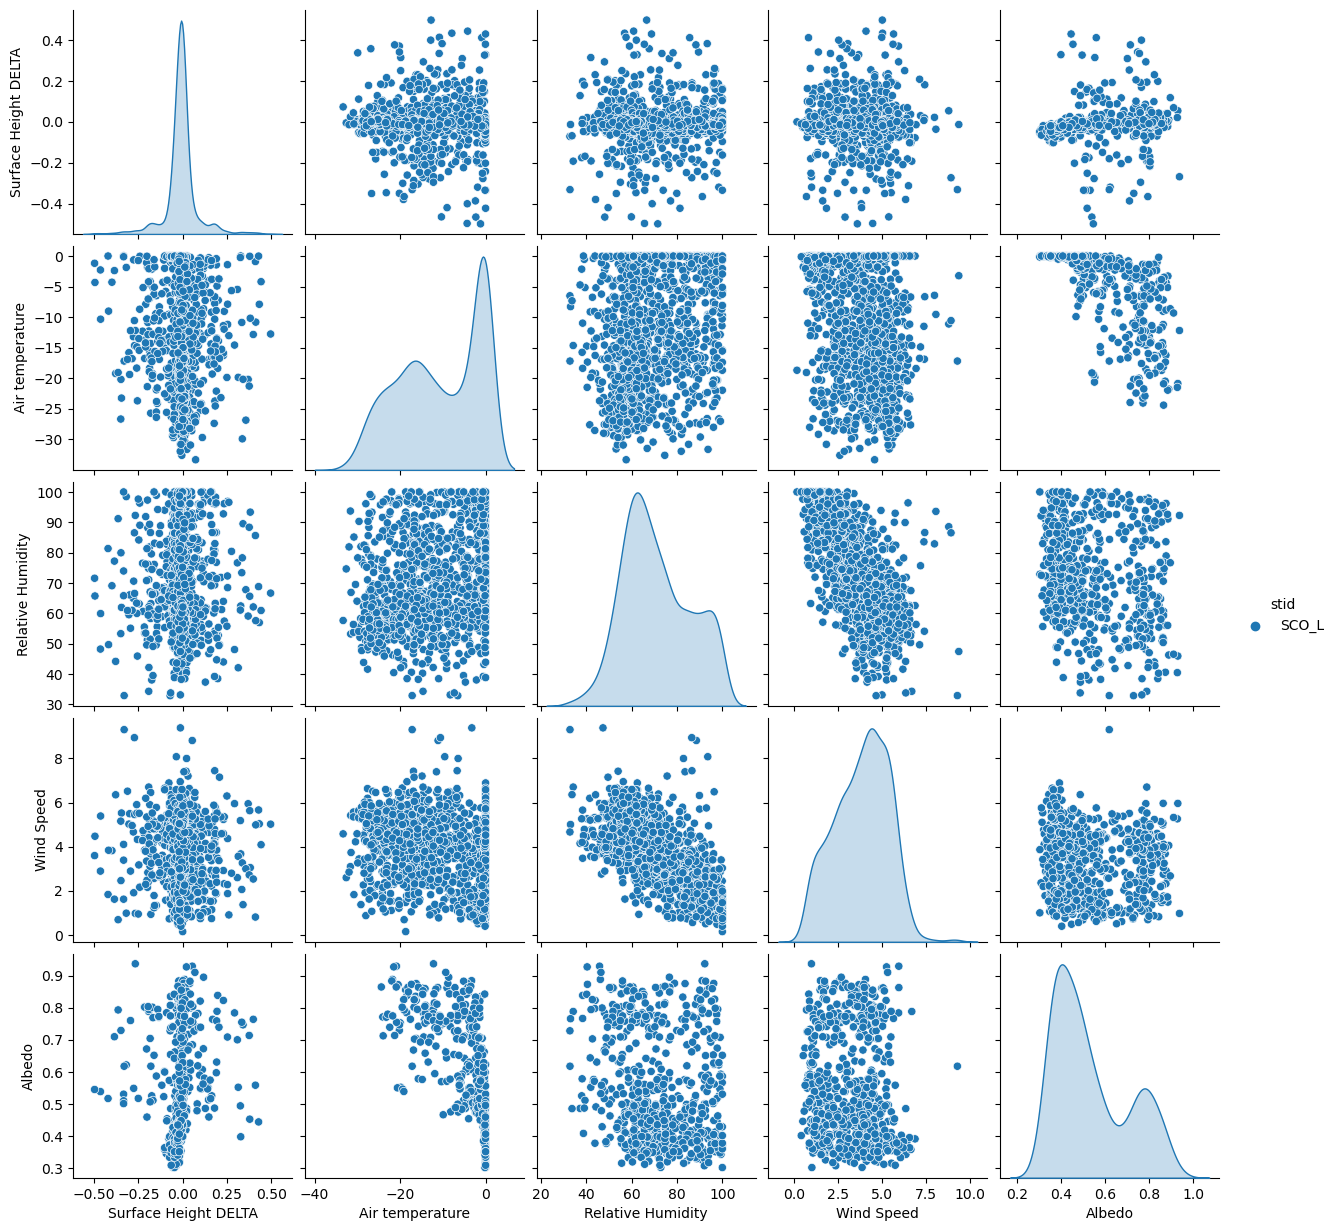

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load or create your dataframe
# For example, load a sample dataset from seaborn

['Datetime', 'Air pressure (upper boom)', 'Air temperature (upper boom)',
       'Relative humidity (upper boom) - corrected',
       'Specific humidity (upper boom)', 'Wind speed (upper boom)',
       'Wind from direction (upper boom)',
       'Downwelling shortwave radiation - corrected',
       'Upwelling shortwave radiation - corrected',
       'Downwelling longwave radiation', 'Upwelling longwave radiation',
       'Surface temperature', 'Latent heat flux (upper boom)',
       'Sensible heat flux (upper boom)',
       'Surface height from combined measurements', 'Albedo', 'Cloud cover',
       'Melting Season']

stations = ['KPC_U', 'QAS_L','SCO_L', 'UPE_L']
stations = ['SCO_L']
# Create a pairplot visualization
df_pair = df.loc[df['stid'].isin(stations)].copy()
df_pair = df_pair.loc[(df_pair['Datetime'].dt.year >2018)]
df_pair['DaysSinceFirst'] = (df_pair['Datetime'] - df['Datetime'].min()).dt.days
df_pair = df_pair.loc[(df_pair['Surface height from combined measurements DELTA'] > -0.5) & (df_pair['Surface height from combined measurements DELTA'] < 0.5)]
df_pair = df_pair[['stid','Surface height from combined measurements DELTA','Surface temperature',  'Relative humidity (upper boom) - corrected', 'Wind speed (upper boom)', 'Albedo']]
df_pair = df_pair.rename(columns={'Surface height from combined measurements DELTA':'Surface Height DELTA','Surface temperature':'Air temperature','Relative humidity (upper boom) - corrected': 'Relative Humidity','Wind speed (upper boom)':'Wind Speed'})

#df_pair.drop(['stid', 'Ablation', 'Melting Season', ],axis=1, inplace=True)
#df_pair = df_pair.select_dtypes(include='float')

sns.pairplot(df_pair, hue='stid')

# Show the plot
plt.show()

In [118]:
df_pair.columns

Index(['Datetime', 'Air pressure (upper boom)', 'Air temperature (upper boom)',
       'Relative humidity (upper boom) - corrected',
       'Specific humidity (upper boom)', 'Wind speed (upper boom)',
       'Wind from direction (upper boom)',
       'Downwelling shortwave radiation - corrected',
       'Upwelling shortwave radiation - corrected',
       'Downwelling longwave radiation', 'Upwelling longwave radiation',
       'Surface temperature', 'Latent heat flux (upper boom)',
       'Sensible heat flux (upper boom)',
       'Surface height from combined measurements', 'Albedo', 'Cloud cover',
       'Melting Season'],
      dtype='object')

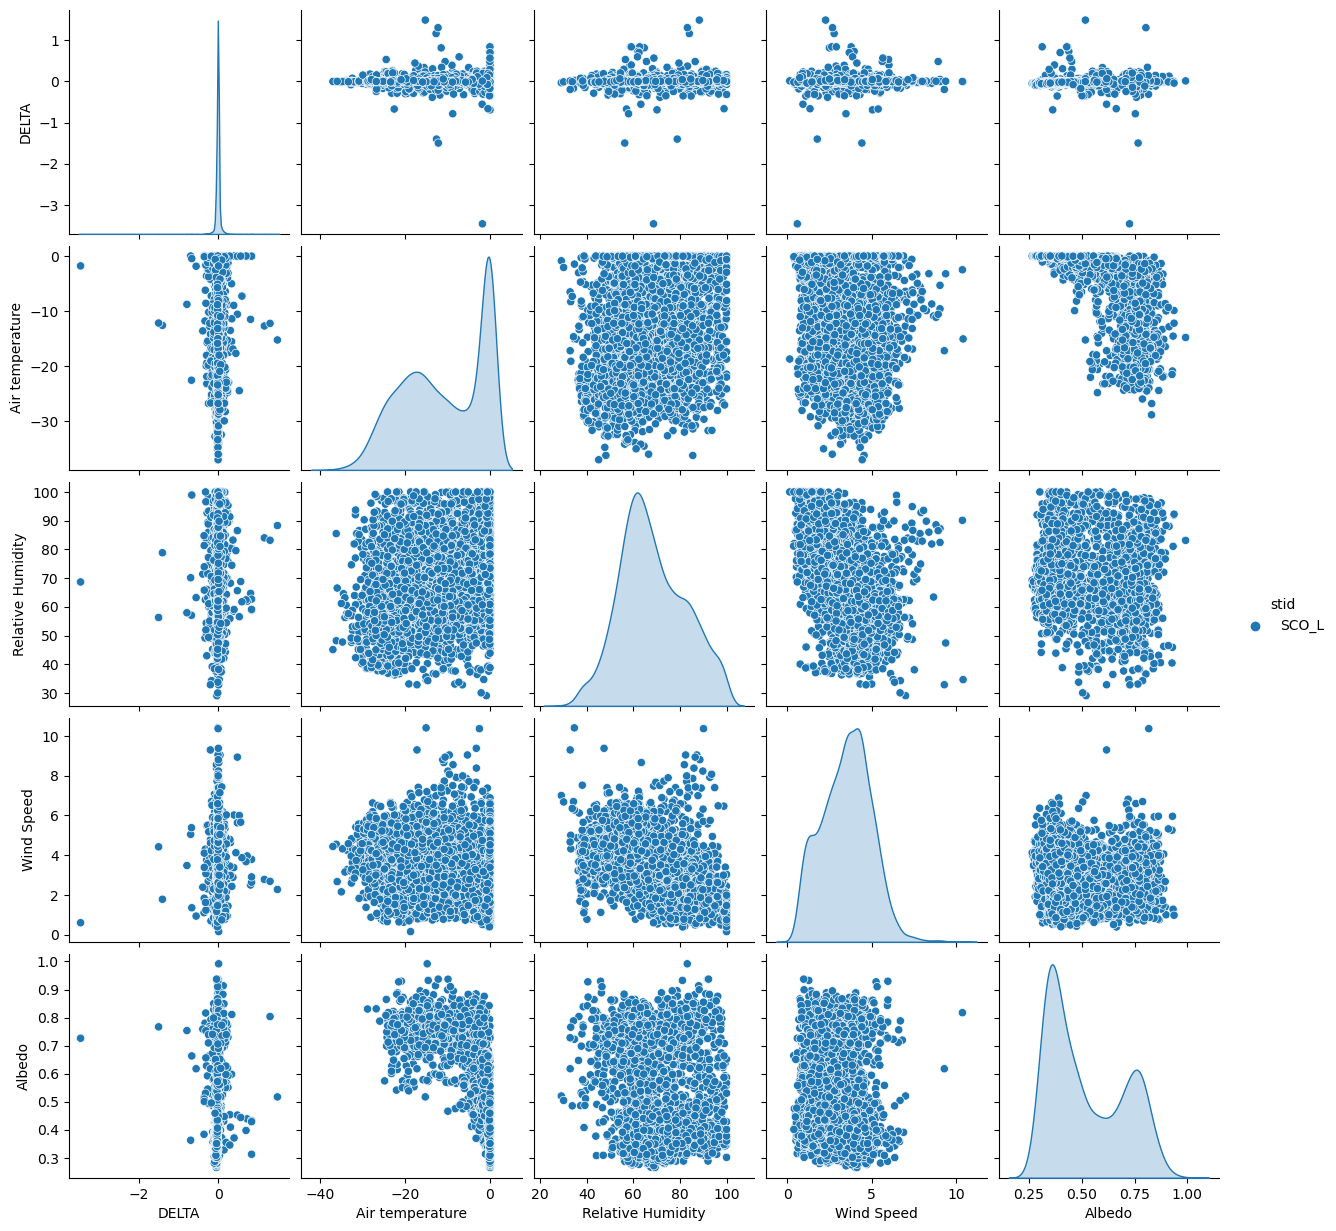

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load or create your dataframe
# For example, load a sample dataset from seaborn

['Datetime', 'Air pressure (upper boom)', 'Air temperature (upper boom)',
       'Relative humidity (upper boom) - corrected',
       'Specific humidity (upper boom)', 'Wind speed (upper boom)',
       'Wind from direction (upper boom)',
       'Downwelling shortwave radiation - corrected',
       'Upwelling shortwave radiation - corrected',
       'Downwelling longwave radiation', 'Upwelling longwave radiation',
       'Surface temperature', 'Latent heat flux (upper boom)',
       'Sensible heat flux (upper boom)',
       'Surface height from combined measurements', 'Albedo', 'Cloud cover',
       'Melting Season']

stations = ['KPC_U', 'QAS_L','SCO_L', 'UPE_L']
stations = ['SCO_L']
# Create a pairplot visualization
df_pair = df.loc[df['stid'].isin(stations)].copy()
#df_pair = df_pair.loc[(df_pair['Datetime'].dt.year >2018)]
df_pair['DELTA'] = df_pair['Surface height from combined measurements'].diff()
#df_pair = df_pair.loc[(df_pair['Surface height from combined measurements DELTA'] > -0.5) & (df_pair['Surface height from combined measurements DELTA'] < 0.5)]
df_pair = df_pair[['stid','DELTA','Surface temperature',  'Relative humidity (upper boom) - corrected', 'Wind speed (upper boom)', 'Albedo']]
df_pair = df_pair.rename(columns={'Surface temperature':'Air temperature','Relative humidity (upper boom) - corrected': 'Relative Humidity','Wind speed (upper boom)':'Wind Speed'})

#df_pair.drop(['stid', 'Ablation', 'Melting Season', ],axis=1, inplace=True)
#df_pair = df_pair.select_dtypes(include='float')

sns.pairplot(df_pair, hue='stid')

# Show the plot
plt.show()